<a href="https://colab.research.google.com/github/Bart-del/studies-machine-learning/blob/main/Zadanie_9_B_Wysocki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Zadanie 9 - Bartłomiej Wysocki

Część podstawowa (4 punkty)

Użyj algorytmu k średnich, aby podzielić zbiór danych flats_for_clustering.tsv na 5 klastrów.

Możesz użyć gotowej implementacji algorytmu, np. z pakietu scikit-learn.
Część zaawansowana (3 punkty)

Użyj algorytmu PCA, by zredukować liczbę wymiarów danych do 2 i przedstawić wyniki klastrowania (wyznaczone w części podstawowej) na dwuwymiarowym wykresie punktowym (punkty należące do różnych klastrów należy oznaczyć np. różnymi kolorami).

Możesz użyć gotowej implementacji algorytmu, np. z pakietu scikit-learn (wskazówka: klasa PCA posiada metodę fit_transform, która od razu dopasowuje i przekształca wejściowy zbiór danych na docelową liczbę wymiarów).

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

Saving flats_for_clustering.tsv to flats_for_clustering.tsv


<h2>Wczytanie danych i utworzenie obiektu DataFrame

In [75]:
data = pd.read_csv('flats_for_clustering.tsv', sep='\t')
df = pd.DataFrame(data)

In [91]:
df = df.replace("parter",0)
df = df.replace("niski parter",-1)
df = df[df.Piętro != 'poddasze']

In [100]:
df = df.dropna()
x = df[df.columns[:4]]
y = df.iloc[:,4]

In [102]:
y

0        0
1        2
2        5
3        2
4       12
        ..
4932     2
4933     4
4934     3
4935     0
4937     2
Name: Piętro, Length: 4248, dtype: object

<h2>Tworzenie modelu

In [114]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
label = model.fit_predict(x)

In [117]:
label

array([0, 2, 2, ..., 1, 0, 3], dtype=int32)

<H2>Część rozszerzona

In [124]:
from sklearn.decomposition import PCA

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(x)
 
df.shape

(4248, 2)

In [125]:
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

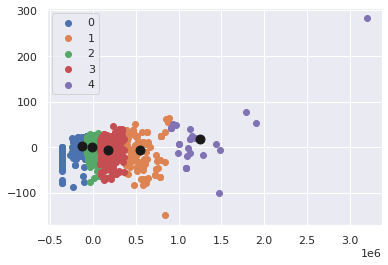

In [126]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()